<p style="font-size:30px;text-align:center"> <b>Machine Learning for Banking</b> </p>
<p style="font-size:25px;text-align:center"> <b>Risk-Based Pricing</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://datahack.analyticsvidhya.com/contest/janatahack-machine-learning-for-banking/ </p>

<h6> Problem statement : </h6>
<p> Classify the loan interest rate category - 1 / 2 / 3</p>

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://datahack.analyticsvidhya.com/contest/janatahack-machine-learning-for-banking/#ProblemStatement
- <p> 
    Data file's information:
    <ul> 
        <li>
        train file (Loan_ID, Loan_Amount_Requested, Length_Employed, Home_Owner,
       Annual_Income, Income_Verified, Purpose_Of_Loan, Debt_To_Income,
       Inquiries_Last_6Mo, Months_Since_Deliquency, Number_Open_Accounts,
       Total_Accounts, Gender, Interest_Rate)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
Loan_ID	Loan_Amount_Requested	Length_Employed	Home_Owner	Annual_Income	Income_Verified	Purpose_Of_Loan	Debt_To_Income	Inquiries_Last_6Mo	Months_Since_Deliquency	Number_Open_Accounts	Total_Accounts	Gender	Interest_Rate<br>
0	10000001	7,000	< 1 year	Rent	68000.0	not verified	car	18.37	0	NaN	9	14	Female	1 <br>
1	10000002	30,000	4 years	Mortgage	NaN	VERIFIED - income	debt_consolidation	14.93	0	17.0	12	24	Female	3 <br>


<h1>3. Exploratory Data Analysis</h1>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from scipy.sparse import coo_matrix, hstack

<h2>3.1. Reading Data</h2>

In [2]:
train = pd.read_csv('train.csv')
print('Number of data points : ', train.shape[0])
print('Number of features : ', train.shape[1])
print('\nFeatures : ', train.columns.values)
train.head()

Number of data points :  164309
Number of features :  14

Features :  ['Loan_ID' 'Loan_Amount_Requested' 'Length_Employed' 'Home_Owner'
 'Annual_Income' 'Income_Verified' 'Purpose_Of_Loan' 'Debt_To_Income'
 'Inquiries_Last_6Mo' 'Months_Since_Deliquency' 'Number_Open_Accounts'
 'Total_Accounts' 'Gender' 'Interest_Rate']


,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>Loan_ID : </b>A unique id for the loan.</li>
        <li><b>Loan_Amount_Requested : </b>The listed amount of the loan applied for by the borrower. </li>
        <li><b>Length_Employed : </b>Employment length in years</li>
        <li><b>Home_Owner : </b>The home ownership status provided by the borrower during registration.</li>
        <li><b>Annual_Income : </b>The annual income provided by the borrower during registration</li>
        <li><b>Income_Verified : </b>Indicates if income was verified, not verified, or if the income source was verified</li>
        <li><b>Debt_To_Income : </b>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested loan, divided by the borrower’s self-reported monthly income..</li>
        <li><b>Inquiries_Last_6Mo : </b>The number of inquiries by creditors during the past 6 months</li>
        <li><b>Months_Since_Deliquency : </b>The number of months since the borrower's last delinquency.</li>
        <li><b>Number_Open_Accounts :</b>The number of open credit lines in the borrower's credit file</li>
        <li><b>Total_Accounts :</b>The total number of credit lines currently in the borrower's credit file</li>
        <li><b>Gender :</b>Gender</li>
        <li><b>Interest_Rate :</b>Target Variable: Interest Rate category (1/2/3) of the loan application</li>
    </ul>

In [3]:
X = train.drop(['Loan_ID', 'Interest_Rate'], axis=1).values
y = train['Interest_Rate'].values.astype(np.int8)
target_names = np.unique(y)
print('\nThere are %d unique target values in this dataset:' % (len(target_names)), target_names)


There are 3 unique target values in this dataset: [1 2 3]


In [4]:
# Check null values in dataset
print("Number of missing values in percentage: \n")
print(round((train.isnull().mean())*100, 2))

Number of missing values in percentage: 

Loan_ID                     0.00
Loan_Amount_Requested       0.00
Length_Employed             4.49
Home_Owner                 15.43
Annual_Income              15.28
Income_Verified             0.00
Purpose_Of_Loan             0.00
Debt_To_Income              0.00
Inquiries_Last_6Mo          0.00
Months_Since_Deliquency    53.79
Number_Open_Accounts        0.00
Total_Accounts              0.00
Gender                      0.00
Interest_Rate               0.00
dtype: float64


Months_Since_Deliquency has more than 50% missing values. So, we can think of dropping the feature or assign a new value for missing value.

We need to impute missing vals in Home_Owner and Annual_Income features and Length_Employed.

In [5]:
print("Number of unique values in each feature: \n")
print(train.nunique())

Number of unique values in each feature: 

Loan_ID                    164309
Loan_Amount_Requested        1290
Length_Employed                11
Home_Owner                      5
Annual_Income               12305
Income_Verified                 3
Purpose_Of_Loan                14
Debt_To_Income               3953
Inquiries_Last_6Mo              9
Months_Since_Deliquency       122
Number_Open_Accounts           58
Total_Accounts                100
Gender                          2
Interest_Rate                   3
dtype: int64


In [6]:
print("Distribution of Target classes:\n",train['Interest_Rate'].value_counts())

print("\nPercenatge of values(%): \n",round((train['Interest_Rate'].value_counts()/train.shape[0])*100, 2))

Distribution of Target classes:
 2    70580
3    59923
1    33806
Name: Interest_Rate, dtype: int64

Percenatge of values(%): 
 2    42.96
3    36.47
1    20.57
Name: Interest_Rate, dtype: float64


In [7]:
train.describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,4.743207e+04,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,1.000000e+07,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,1.016431e+07,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


<h3>Univariate of Continuous features</h3>

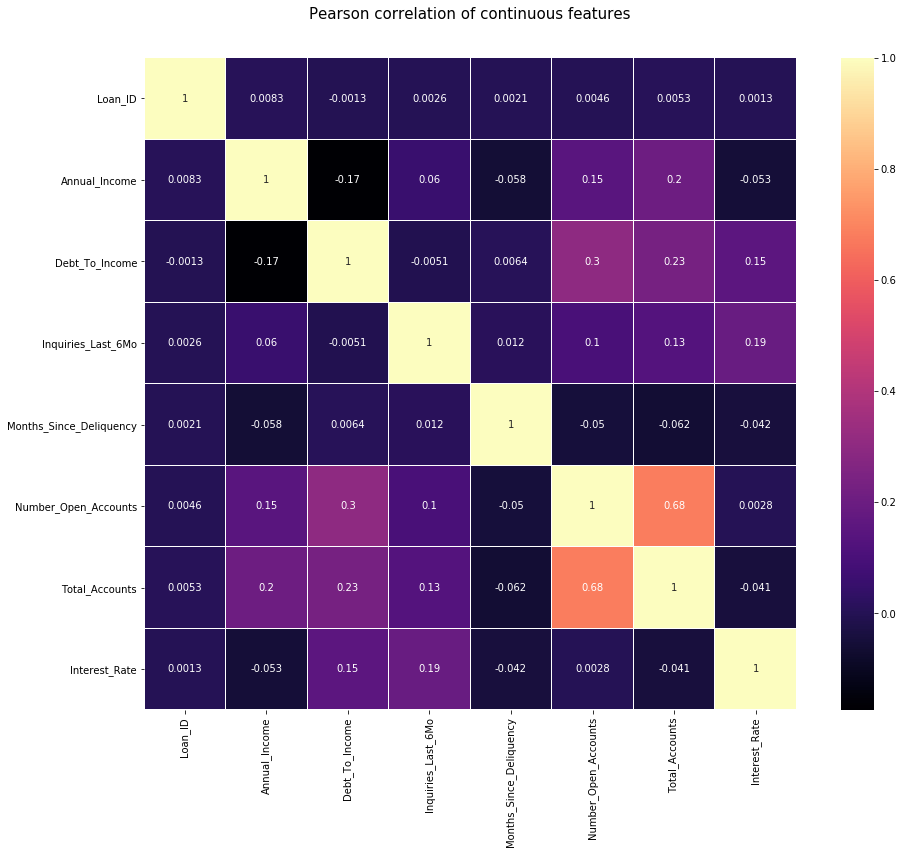

In [8]:
colormap = plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

From correlation plot, we can see features display very less correlation.

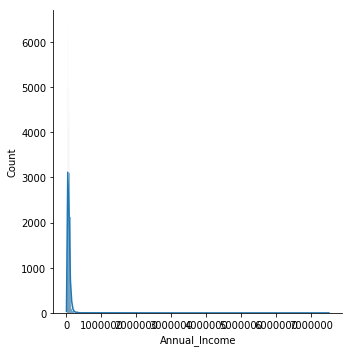

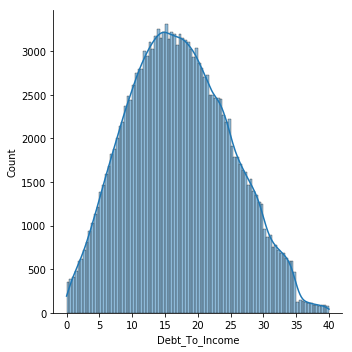

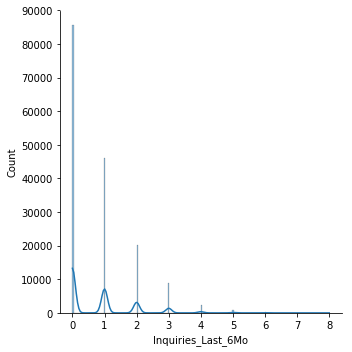

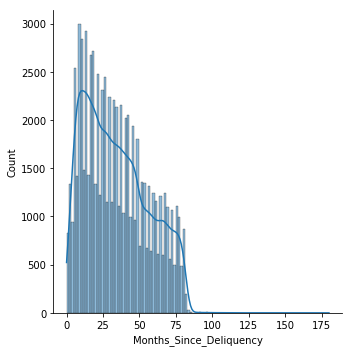

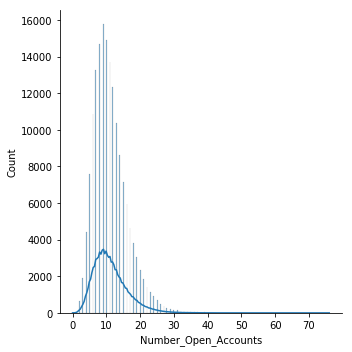

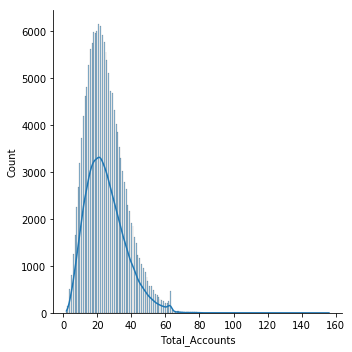

In [9]:
all_columns = [ 'Annual_Income', 'Debt_To_Income', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts']
for column in all_columns:
    sns.displot(data=train, x=column, kde=True)
    plt.show()

In above plot, we can see that the distribution of Annual_Income is right skewed. Number of people having very high income is very less. 

'Inquiries_Last_6Mo', 'Months_Since_Deliquency' do not follow any distribution we can try feature transformation.
 
Total_Accounts, Number_Open_Accounts, Debt_To_Income follow nearly gaussian distribution.

In [10]:
train['Months_Since_Deliquency_cbrt'] = np.cbrt(train['Months_Since_Deliquency'])
train['Annual_Income_cbrt'] = np.cbrt(train['Annual_Income'])
# Annual_Income

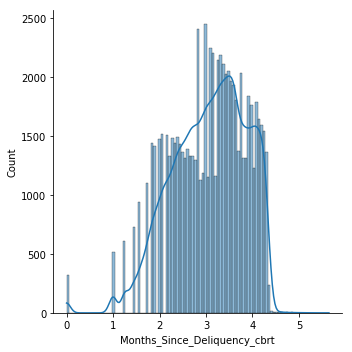

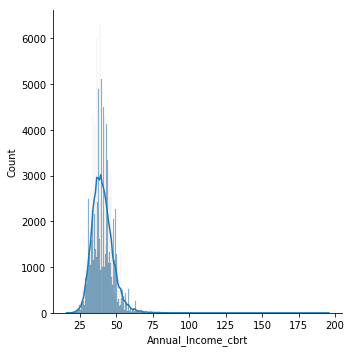

In [11]:
sns.displot(data=train, x='Months_Since_Deliquency_cbrt', kde=True)
sns.displot(data=train, x='Annual_Income_cbrt', kde=True)

<h4>Outliers</h4>

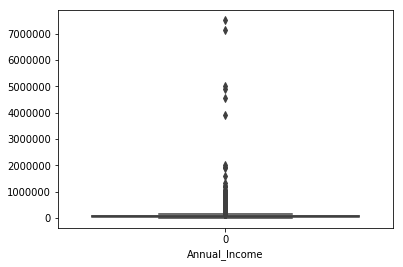

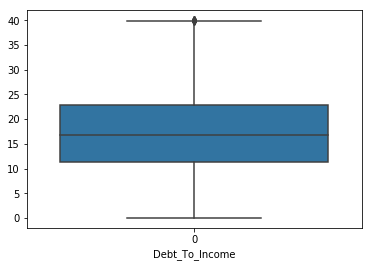

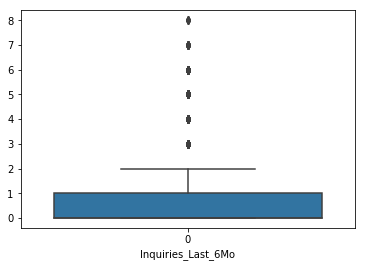

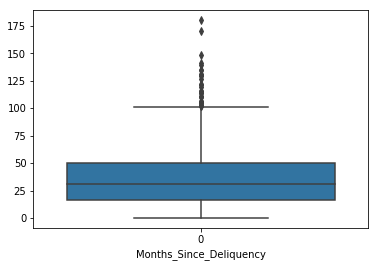

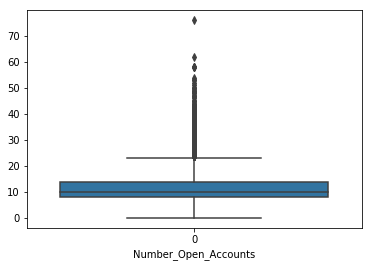

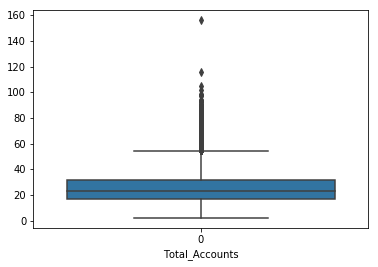

In [12]:
for column in all_columns:
    sns.boxplot(data=train[column]).set(xlabel=column)
    plt.show()

It looks like all the above features have outliers which should be treated.

In [13]:
def categorical_plots(data, x):
    chart = sns.countplot(x=x, data=data, edgecolor=sns.color_palette("dark", 3))
    chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
    plt.show()

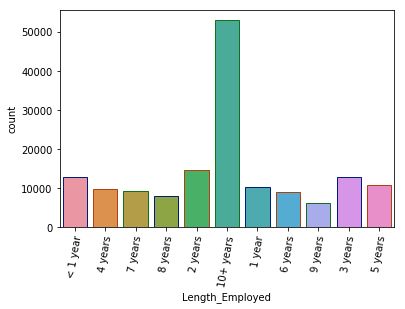

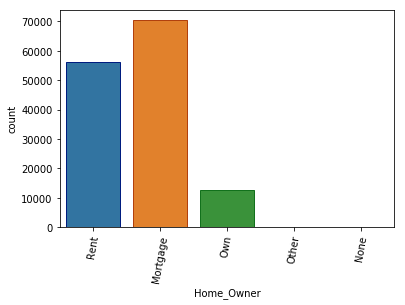

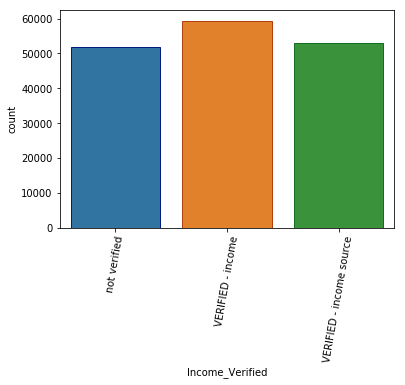

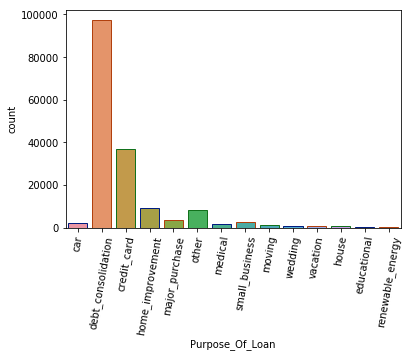

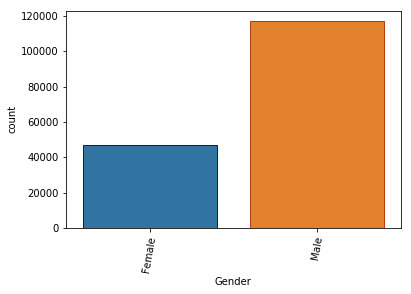

In [14]:
column_object = train.select_dtypes(include=['O']).columns.tolist()
for column in column_object:
    if not column == 'Loan_Amount_Requested':
        categorical_plots(train, column)

<h4>Interest rate analysis</h4>

In [33]:
train_class_distribution = train['Interest_Rate'].value_counts().sort_index()

sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train.shape[0]*100), 3), '%)')

Number of data points in class 2 : 70580 ( 42.956 %)
Number of data points in class 3 : 59923 ( 36.47 %)
Number of data points in class 1 : 33806 ( 20.575 %)


In [15]:
train.groupby(['Interest_Rate'])['Annual_Income'].mean()

Interest_Rate
1    81295.256362
2    71179.185595
3    71371.981313
Name: Annual_Income, dtype: float64

People paying interest rate in slab 1, have highest average income.

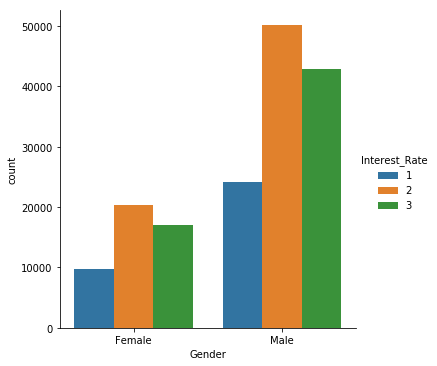

In [16]:
sns.catplot(x="Gender", hue="Interest_Rate", kind="count", data=train)

In [17]:
train['Gender'].value_counts()

Male      117176
Female     47133
Name: Gender, dtype: int64

From the above two figures, We can clearly observe number of male is very high than female in every interest slabs

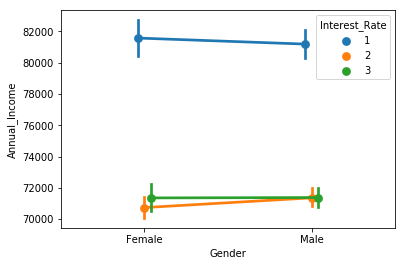

In [18]:
sns.pointplot(x="Gender", y="Annual_Income", hue='Interest_Rate', data=train, dodge=True)

In [19]:
print(train.groupby(['Gender','Interest_Rate'])['Annual_Income'].mean())

Gender  Interest_Rate
Female  1                81570.743431
        2                70737.007127
        3                71355.472335
Male    1                81184.624831
        2                71358.734586
        3                71378.590194
Name: Annual_Income, dtype: float64


A point plot shows the mean value comparison.

This is an interesting plot, we can observe that both Men and women have more or less same income. Men in interest slab 1 have slightly less than that of womens annual income.